# 1.0 Full Exploratory Data Analysis

## Explore data

### Read data

In [11]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [12]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  330327 non-null  object
 1   date            330327 non-null  object
 2   value           330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


In [13]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [14]:
sns.set_style("whitegrid")

In [15]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [16]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [17]:
import final_project.visualization.visualize as visualize 

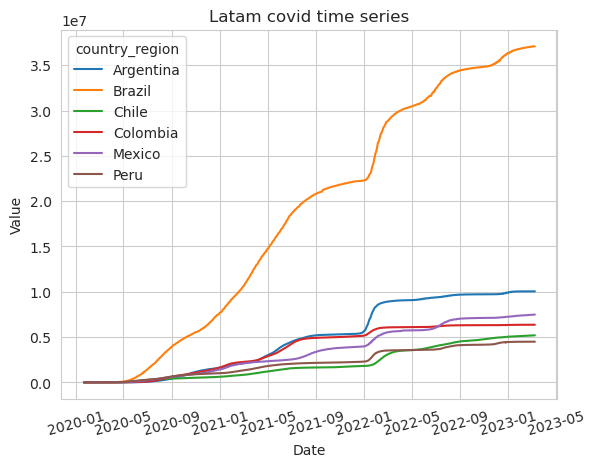

In [18]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [19]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(25)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,53813184406,lightblue
1,India,29131119694,lightblue
2,Brazil,21182690594,red
3,France,16105911886,lightblue
4,Germany,13686043720,lightblue


Plot to Latam in highlighted bars.

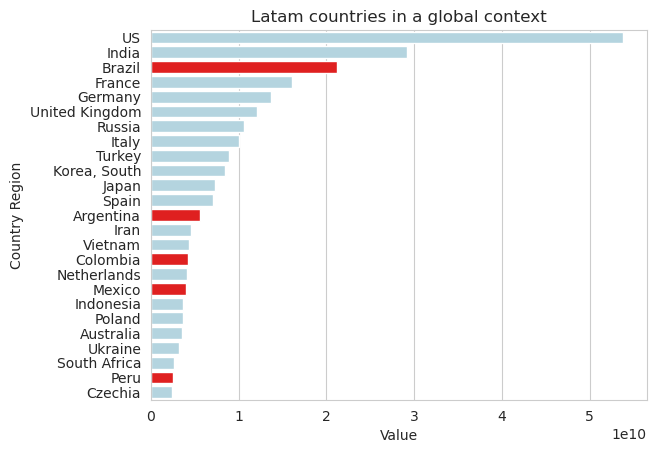

In [20]:
visualize.latam_countries_in_a_grobal_context(top_countries_df)